<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlib01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

matplotlib を勉強する。 何度かチャレンジして失敗しているので、アイデアが必要。

本家のチュートリアルが読めない。 あれは読むようには書かれていないのではないか!!!!

サンプルから学ぶ方法もうまく行っていない。 matplotlib でかかれた図はディープラーニング、AIのが多くてひょっとしたらおもしろいのかもしれないのだが、どうもしっくりこない。 たぶん複雑すぎるのだと思う。

&nbsp;



アイデア
- 若干試行錯誤が入ってめんどうなノートになってしまうと思うが実験学習とする。
- ひとのサイトを読みながら学習する。   
- 日本語で考える。 数式で考える。文字を足す。  
- 数直線とか、ただの三角とかをできるだけ簡単に描く方法を考える。


参考サイト: 
1. 本家サイト https://matplotlib.org/   
1. https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
1. https://qiita.com/yohm/items/1daa5aabbdb1e8edbf26
1. https://www.python.ambitious-engineer.com/archives/2673
1. https://tutorials.chainer.org/ja/12_Introduction_to_Matplotlib.html
1. https://aiacademy.jp/media/?p=154

&nbsp;


# 日本語が使えるようにする

In [ ]:
# 現在20210325 import japanize_matplotlib のために、下記が必要
%%capture
!pip install japanize_matplotlib

次のように import japanize_matplotlib とすれば matplotlib で日本語が使えるようになる。

Colab のいろんな機能はすべて日本語が使えるが、matplotlib だけエラーになる。 理由があるのだろうが、いずれ直るのかもしれないが、とりあえず、日本語は使わないか、もしくは japanize_matplotlib を install, import する。

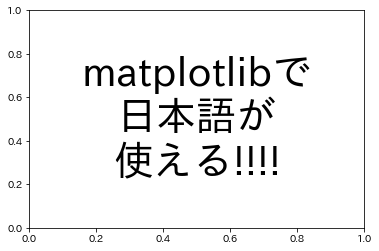

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.text(0.5, 0.5, 'matplotlibで\n日本語が\n使える!!!!'
    , fontsize=40
    , horizontalalignment='center'
    , verticalalignment='center')
plt.show()

# 点を打つ plot scatter




matplotlib.pyplot を import して plot するだけで適当な座標で描かれる。

メモ $\quad$ plt.plot ではなく、ax.plot のバージョンも書くこと


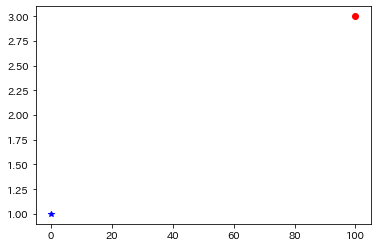

In [ ]:
# matplotlib.pyplot を import して plot するだけで適当な座標で描かれる
import matplotlib.pyplot as plt
plt.plot([100],[3],'ro')
plt.plot([0],[1],'b*') # b は青 blue みたいだが黒はなにか? => "k"
plt.show() # これはなくても描かれるが、あった方がよい

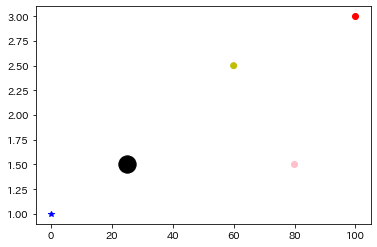

In [ ]:
# matplotlib.pyplot を import して plot するだけで適当な座標で描かれる
# ax.plot のバージョンを書く
# scatter を使ってみる。 ax.scatter? で構文を調べる => plot とはだいぶ違う
import matplotlib.pyplot as plt
fig, ax = plt.subplots ()
ax.plot([100],[3],'ro')
ax.plot([0],[1],'b*') 
ax.scatter([60,80],[2.5, 1.5], c=['y','pink']) 
ax.scatter(25,1.5, c='k',s=300) 
plt.show() 

アイデア $\quad$ もっと日本語を増やす。

テキストセルを増やす。

なぜなら、コードセルで実験するのもよいが、その意味を言葉で考えることで、コードの意味が何倍にもなる。

&nbsp;


# svg で出力し、svg を表示してみる

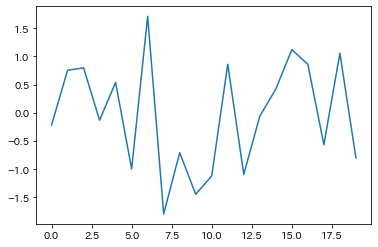

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(20)
plt.plot(data)
plt.savefig("line.svg", format="svg")

In [ ]:
myfile=open('line.svg')
lines=myfile.read()
print(lines)


<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Created with matplotlib (https://matplotlib.org/) -->
<svg height="288pt" version="1.1" viewBox="0 0 432 288" width="432pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <style type="text/css">
*{stroke-linecap:butt;stroke-linejoin:round;}
  </style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 288 
L 432 288 
L 432 0 
L 0 0 
z
" style="fill:#ffffff;"/>
  </g>
  <g id="axes_1">
   <g id="patch_2">
    <path d="M 54 252 
L 388.8 252 
L 388.8 34.56 
L 54 34.56 
z
" style="fill:#ffffff;"/>
   </g>
   <g id="matplotlib.axis_1">
    <g id="xtick_1">
     <g id="line2d_1">
      <defs>
       <path d="M 0 0 
L 0 3.5 
" id="ma8ee0f7fea" style="stroke:#000000;stroke-width:0.8;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="69.218182" xlink:

In [ ]:
#@title
%%html
<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Created with matplotlib (https://matplotlib.org/) -->
<svg height="288pt" version="1.1" viewBox="0 0 432 288" width="432pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <style type="text/css">
*{stroke-linecap:butt;stroke-linejoin:round;}
  </style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 288 
L 432 288 
L 432 0 
L 0 0 
z
" style="fill:#ffffff;"/>
  </g>
  <g id="axes_1">
   <g id="patch_2">
    <path d="M 54 252 
L 388.8 252 
L 388.8 34.56 
L 54 34.56 
z
" style="fill:#ffffff;"/>
   </g>
   <g id="matplotlib.axis_1">
    <g id="xtick_1">
     <g id="line2d_1">
      <defs>
       <path d="M 0 0 
L 0 3.5 
" id="m56396d2082" style="stroke:#000000;stroke-width:0.8;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="69.218182" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_1">
      <!-- 0.0 -->
      <defs>
       <path d="M 31.78125 66.40625 
Q 24.171875 66.40625 20.328125 58.90625 
Q 16.5 51.421875 16.5 36.375 
Q 16.5 21.390625 20.328125 13.890625 
Q 24.171875 6.390625 31.78125 6.390625 
Q 39.453125 6.390625 43.28125 13.890625 
Q 47.125 21.390625 47.125 36.375 
Q 47.125 51.421875 43.28125 58.90625 
Q 39.453125 66.40625 31.78125 66.40625 
z
M 31.78125 74.21875 
Q 44.046875 74.21875 50.515625 64.515625 
Q 56.984375 54.828125 56.984375 36.375 
Q 56.984375 17.96875 50.515625 8.265625 
Q 44.046875 -1.421875 31.78125 -1.421875 
Q 19.53125 -1.421875 13.0625 8.265625 
Q 6.59375 17.96875 6.59375 36.375 
Q 6.59375 54.828125 13.0625 64.515625 
Q 19.53125 74.21875 31.78125 74.21875 
z
" id="DejaVuSans-48"/>
       <path d="M 10.6875 12.40625 
L 21 12.40625 
L 21 0 
L 10.6875 0 
z
" id="DejaVuSans-46"/>
      </defs>
      <g transform="translate(61.266619 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-48"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_2">
     <g id="line2d_2">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="109.266029" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_2">
      <!-- 2.5 -->
      <defs>
       <path d="M 19.1875 8.296875 
L 53.609375 8.296875 
L 53.609375 0 
L 7.328125 0 
L 7.328125 8.296875 
Q 12.9375 14.109375 22.625 23.890625 
Q 32.328125 33.6875 34.8125 36.53125 
Q 39.546875 41.84375 41.421875 45.53125 
Q 43.3125 49.21875 43.3125 52.78125 
Q 43.3125 58.59375 39.234375 62.25 
Q 35.15625 65.921875 28.609375 65.921875 
Q 23.96875 65.921875 18.8125 64.3125 
Q 13.671875 62.703125 7.8125 59.421875 
L 7.8125 69.390625 
Q 13.765625 71.78125 18.9375 73 
Q 24.125 74.21875 28.421875 74.21875 
Q 39.75 74.21875 46.484375 68.546875 
Q 53.21875 62.890625 53.21875 53.421875 
Q 53.21875 48.921875 51.53125 44.890625 
Q 49.859375 40.875 45.40625 35.40625 
Q 44.1875 33.984375 37.640625 27.21875 
Q 31.109375 20.453125 19.1875 8.296875 
z
" id="DejaVuSans-50"/>
       <path d="M 10.796875 72.90625 
L 49.515625 72.90625 
L 49.515625 64.59375 
L 19.828125 64.59375 
L 19.828125 46.734375 
Q 21.96875 47.46875 24.109375 47.828125 
Q 26.265625 48.1875 28.421875 48.1875 
Q 40.625 48.1875 47.75 41.5 
Q 54.890625 34.8125 54.890625 23.390625 
Q 54.890625 11.625 47.5625 5.09375 
Q 40.234375 -1.421875 26.90625 -1.421875 
Q 22.3125 -1.421875 17.546875 -0.640625 
Q 12.796875 0.140625 7.71875 1.703125 
L 7.71875 11.625 
Q 12.109375 9.234375 16.796875 8.0625 
Q 21.484375 6.890625 26.703125 6.890625 
Q 35.15625 6.890625 40.078125 11.328125 
Q 45.015625 15.765625 45.015625 23.390625 
Q 45.015625 31 40.078125 35.4375 
Q 35.15625 39.890625 26.703125 39.890625 
Q 22.75 39.890625 18.8125 39.015625 
Q 14.890625 38.140625 10.796875 36.28125 
z
" id="DejaVuSans-53"/>
      </defs>
      <g transform="translate(101.314466 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-50"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
    <g id="xtick_3">
     <g id="line2d_3">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="149.313876" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_3">
      <!-- 5.0 -->
      <g transform="translate(141.362313 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-53"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_4">
     <g id="line2d_4">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="189.361722" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_4">
      <!-- 7.5 -->
      <defs>
       <path d="M 8.203125 72.90625 
L 55.078125 72.90625 
L 55.078125 68.703125 
L 28.609375 0 
L 18.3125 0 
L 43.21875 64.59375 
L 8.203125 64.59375 
z
" id="DejaVuSans-55"/>
      </defs>
      <g transform="translate(181.41016 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-55"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
    <g id="xtick_5">
     <g id="line2d_5">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="229.409569" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_5">
      <!-- 10.0 -->
      <defs>
       <path d="M 12.40625 8.296875 
L 28.515625 8.296875 
L 28.515625 63.921875 
L 10.984375 60.40625 
L 10.984375 69.390625 
L 28.421875 72.90625 
L 38.28125 72.90625 
L 38.28125 8.296875 
L 54.390625 8.296875 
L 54.390625 0 
L 12.40625 0 
z
" id="DejaVuSans-49"/>
      </defs>
      <g transform="translate(218.276757 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-49"/>
       <use x="63.623047" xlink:href="#DejaVuSans-48"/>
       <use x="127.246094" xlink:href="#DejaVuSans-46"/>
       <use x="159.033203" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_6">
     <g id="line2d_6">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="269.457416" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_6">
      <!-- 12.5 -->
      <g transform="translate(258.324604 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-49"/>
       <use x="63.623047" xlink:href="#DejaVuSans-50"/>
       <use x="127.246094" xlink:href="#DejaVuSans-46"/>
       <use x="159.033203" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
    <g id="xtick_7">
     <g id="line2d_7">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="309.505263" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_7">
      <!-- 15.0 -->
      <g transform="translate(298.372451 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-49"/>
       <use x="63.623047" xlink:href="#DejaVuSans-53"/>
       <use x="127.246094" xlink:href="#DejaVuSans-46"/>
       <use x="159.033203" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="xtick_8">
     <g id="line2d_8">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="349.55311" xlink:href="#m56396d2082" y="252"/>
      </g>
     </g>
     <g id="text_8">
      <!-- 17.5 -->
      <g transform="translate(338.420298 266.598437)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-49"/>
       <use x="63.623047" xlink:href="#DejaVuSans-55"/>
       <use x="127.246094" xlink:href="#DejaVuSans-46"/>
       <use x="159.033203" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
   </g>
   <g id="matplotlib.axis_2">
    <g id="ytick_1">
     <g id="line2d_9">
      <defs>
       <path d="M 0 0 
L -3.5 0 
" id="me14d497426" style="stroke:#000000;stroke-width:0.8;"/>
      </defs>
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="54" xlink:href="#me14d497426" y="232.676816"/>
      </g>
     </g>
     <g id="text_9">
      <!-- −1.0 -->
      <defs>
       <path d="M 10.59375 35.5 
L 73.1875 35.5 
L 73.1875 27.203125 
L 10.59375 27.203125 
z
" id="DejaVuSans-8722"/>
      </defs>
      <g transform="translate(22.717187 236.476034)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-8722"/>
       <use x="83.789062" xlink:href="#DejaVuSans-49"/>
       <use x="147.412109" xlink:href="#DejaVuSans-46"/>
       <use x="179.199219" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="ytick_2">
     <g id="line2d_10">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="54" xlink:href="#me14d497426" y="199.024793"/>
      </g>
     </g>
     <g id="text_10">
      <!-- −0.5 -->
      <g transform="translate(22.717187 202.824011)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-8722"/>
       <use x="83.789062" xlink:href="#DejaVuSans-48"/>
       <use x="147.412109" xlink:href="#DejaVuSans-46"/>
       <use x="179.199219" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
    <g id="ytick_3">
     <g id="line2d_11">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="54" xlink:href="#me14d497426" y="165.37277"/>
      </g>
     </g>
     <g id="text_11">
      <!-- 0.0 -->
      <g transform="translate(31.096875 169.171988)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-48"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="ytick_4">
     <g id="line2d_12">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="54" xlink:href="#me14d497426" y="131.720747"/>
      </g>
     </g>
     <g id="text_12">
      <!-- 0.5 -->
      <g transform="translate(31.096875 135.519965)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-48"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
    <g id="ytick_5">
     <g id="line2d_13">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="54" xlink:href="#me14d497426" y="98.068724"/>
      </g>
     </g>
     <g id="text_13">
      <!-- 1.0 -->
      <g transform="translate(31.096875 101.867943)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-49"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-48"/>
      </g>
     </g>
    </g>
    <g id="ytick_6">
     <g id="line2d_14">
      <g>
       <use style="stroke:#000000;stroke-width:0.8;" x="54" xlink:href="#me14d497426" y="64.416701"/>
      </g>
     </g>
     <g id="text_14">
      <!-- 1.5 -->
      <g transform="translate(31.096875 68.21592)scale(0.1 -0.1)">
       <use xlink:href="#DejaVuSans-49"/>
       <use x="63.623047" xlink:href="#DejaVuSans-46"/>
       <use x="95.410156" xlink:href="#DejaVuSans-53"/>
      </g>
     </g>
    </g>
   </g>
   <g id="line2d_15">
    <path clip-path="url(#p4ff7bdd386)" d="M 69.218182 242.116364 
L 85.237321 177.67587 
L 101.256459 104.896053 
L 117.275598 201.862161 
L 133.294737 151.50098 
L 149.313876 44.443636 
L 165.333014 151.675871 
L 181.352153 162.384194 
L 197.371292 121.071665 
L 213.390431 211.597791 
L 229.409569 44.730738 
L 245.428708 213.081111 
L 261.447847 156.336359 
L 277.466986 216.897733 
L 293.486124 155.843186 
L 309.505263 230.971469 
L 325.524402 212.410814 
L 341.543541 78.886708 
L 357.562679 155.970796 
L 373.581818 91.505867 
" style="fill:none;stroke:#1f77b4;stroke-linecap:square;stroke-width:1.5;"/>
   </g>
   <g id="patch_3">
    <path d="M 54 252 
L 54 34.56 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>
   </g>
   <g id="patch_4">
    <path d="M 388.8 252 
L 388.8 34.56 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>
   </g>
   <g id="patch_5">
    <path d="M 54 252 
L 388.8 252 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>
   </g>
   <g id="patch_6">
    <path d="M 54 34.56 
L 388.8 34.56 
" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>
   </g>
  </g>
 </g>
 <defs>
  <clipPath id="p4ff7bdd386">
   <rect height="217.44" width="334.8" x="54" y="34.56"/>
  </clipPath>
 </defs>
</svg>


# ランダムに点を打つ

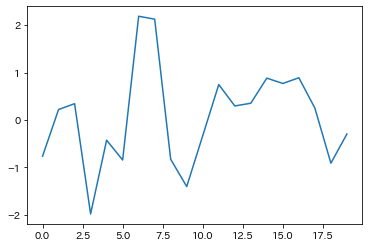

In [ ]:
# ランダムに点を打つ
# np.random.randn() は標準偏差 1 の正規分布の乱数を発生する
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(20)
plt.plot(data)
plt.show()

x 軸も y 軸も乱数にしてみる

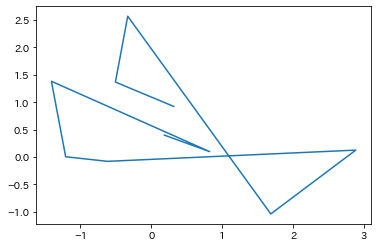

In [ ]:
# ランダムに点を打つ => 動画にしたいがいまはまだ
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randn(10)
y = np.random.randn(10)
plt.plot(x,y)
plt.show()

$y = ax +b$ の直線の周辺に乱数で点を打つ

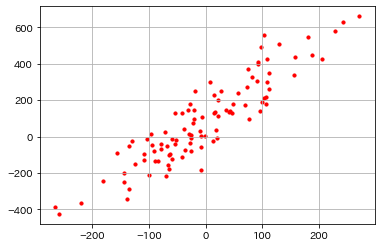

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# x = np.linspace(1,10,100)
x = np.array(list(map(lambda x: x*100, np.random.randn(100))))
y = 2*x+100
y = y + np.random.randn(100)*100
plt.scatter(x, y, c='red', s=10)
plt.grid()
plt.show()

scatter は plot より細かな設定が可能だが、折れ線グラフは plot 。

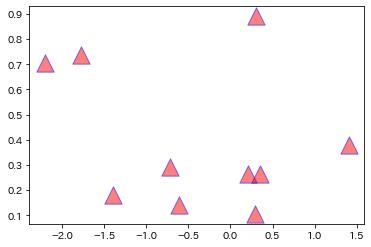

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10) # 正規分布の乱数生成
y = np.random.rand(10) # 0-1の間の乱数を生成

plt.scatter(x, y, s=300, c="red", alpha=0.5,edgecolors="blue", marker="^")
plt.show()

# fig の描画エリアを指定する

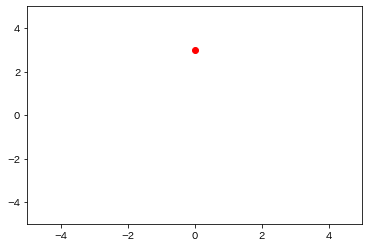

In [ ]:
import matplotlib.pyplot as plt
# はじめに描画エリアを定義して変数に代入する
fig = plt.figure (figsize=(6,4)) # 単位はインチ
# plt.rcParams['figure.figsize'] =8,6 という書き方もある
# fig, ax = plt.subplots () # こうすると、fig と ax が一度につくれるので、おまかせでそうしている例が多い
# ここでは add_subplot を使って変数に代入する
ax = fig.add_subplot(xlim=(-1,3), ylim=(-1,4)) # グラフのそれぞれは ax と呼ばれる。複数は axes
ax.axis([-5,5,-5,5]) # ax を作ってから、こうして座標 axisを変えることができる。
ax.plot([0],[3],'ro') # 座標の外に点を打つと表示されない。座標が定義されていないとシステムが適当な座標を作る
plt.show()

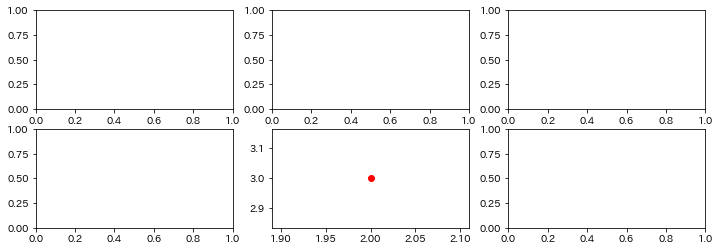

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(num=3,figsize=(12,4)) # 描画エリアを横12インチ縦4インチで取る。描画エリアの番号を 3 とする
ax = fig.subplots(2, 3) # その描画エリアに 2 x 3 の グラフを配置する
ax[1][1].plot(2,3,'ro') # ゼロベースで数えて 1行 1列のグラフに、座標 (2,3) に赤い丸を打つ
plt.show()

In [ ]:
fig.number

3

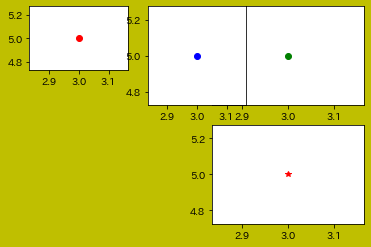

In [ ]:
# 描画エリアにグラフを配置する
import matplotlib.pyplot as plt

fig = plt.figure (figsize=(6,4), facecolor='y') # figsizeは前回のが使われてしまうので毎回指定した方がよい
ax1 = fig.add_subplot(222) # 2 x 2 の 2番目のグラフ (1ベース)
ax2 = fig.add_subplot(331)
ax3 = fig.add_subplot(232)
ax4 = fig.add_subplot(224)

ax1.plot(3,5,'go') # 2 x 2 の 2番目のグラフに緑の点を打つ
ax2.plot(3,5,'ro') # 3 x 3 の 1番目のグラフに赤の点を打つ
ax3.plot(3,5,'bo') # 2 x 3 の 2番目のグラフに青の点を打つ
ax4.plot(3,5,'r*') # 2 x 2 の 4番目のグラフに赤のアスタリスクを打つ

plt.show()

次の例は plt.subplots の help にある example 

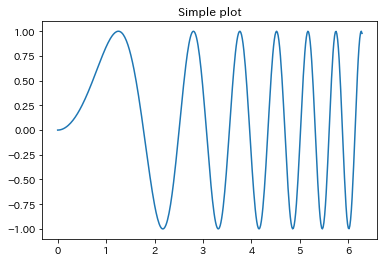

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400) 
y = np.sin(x**2)
# x, y は numpy.ndarray <= print(type(x)) でわかる。n-dimensional array
# ちなみに python は普通 list を使う。遅いらしい
# numpy では ndarray で逆に list は使わないが、ほとんど同じ。list, np.array で相互変換

# Create just a figure and only one subplot
fig, ax = plt.subplots() 
ax.plot(x, y) 
ax.set_title('Simple plot')
plt.show() # plt.show() しなくても図は描けているが、コードセル最後の式の返り値も表示されてしまう


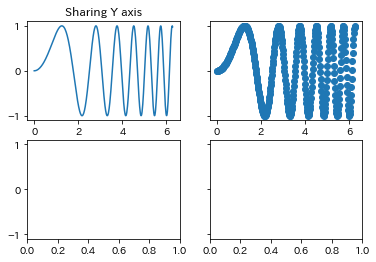

In [ ]:
# subplots の使い方
import matplotlib.pyplot as plt
import numpy as np
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
# Create two subplots and unpack the output array immediately
f, ([[ax1,ax2],[ax3,ax4]]) = plt.subplots(2,2, sharey=True) 
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # share y-axis
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

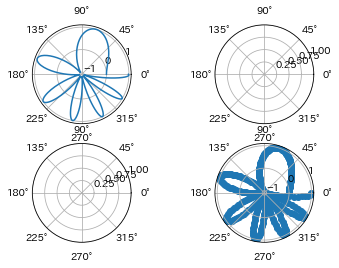

In [ ]:
# subplots の使い方 円グラフ
import matplotlib.pyplot as plt
import numpy as np
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
# fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)
plt.show()

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f003ed59050>,
       dtype=object))

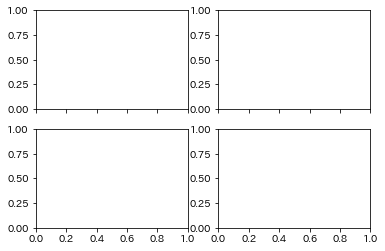

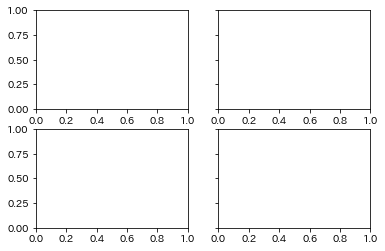

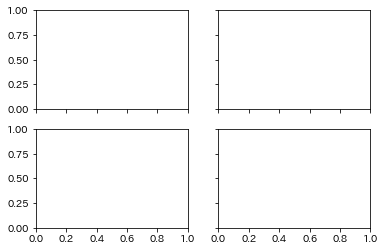

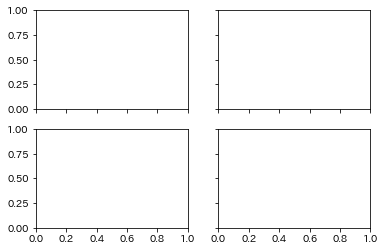

In [ ]:
# 座標メモリの共有
import matplotlib.pyplot as plt

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)


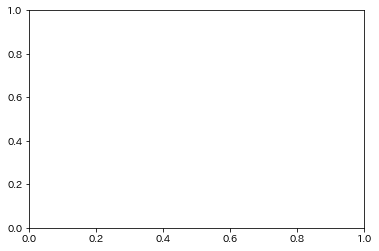

In [ ]:
import matplotlib.pyplot as plt
# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

In [ ]:
fig.number

10

In [ ]:
import numpy as np
arr = [[1, 2], [3, 4]] # 入れ子のリスト
a = np.array(arr) # ndarray に変換 n dimensional array
print (type (arr)) # class list
print (type (a)) # class ndarray
print (a)
print (a.ndim) # 次元数
print (a.shape) # m * n
print (a.size) # 要素数
print (a.dtype) # データ型 int とか float とか
print (a.data)

<class 'list'>
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
2
(2, 2)
4
int64


# 三角形を描く

1. 三角形を描く。
2. 座標を消す。
3. A, B, C という頂点を振る。

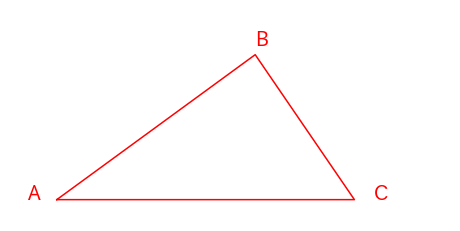

In [ ]:
# 三角形を描く
import matplotlib.pyplot as plt
import numpy as np
# fig, ax = plt.subplots () 
fig = plt.figure (figsize=(8,4), facecolor='w')
ax = fig.add_subplot(xlim=(-0.5,4), ylim=(-0.5,4), )


x = [0, 2, 3, 0]
y = [0, 3, 0, 0]
ax.plot(x, y,'r-')

ax.text(-0.3,0.0,'A',color='red',fontsize=20)
ax.text(2.0,3.2,'B',color='red',fontsize=20)
ax.text(3.2,0.0,'C',color='red',fontsize=20)

ax.set_axis_off()
plt.show()

とりあえず描けた

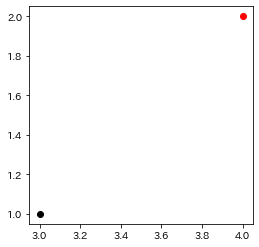

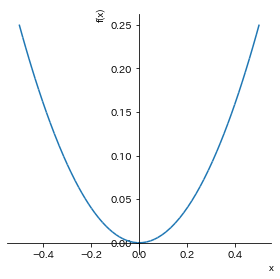

In [ ]:
# plt.plot は plt.rcParamsとfig=plt.figureの両方があった場合どちらに描くか
# どちらかしかなければそこに描く。両方ある場合は fig=lt.figureのに描かれる
# sympyの plot は fig, ax では使えない。
# 以下実験
from sympy import *
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(12,4)) # これをコメントアウトすると、このエリアに描かれる
plt.rcParams['figure.figsize']=(4,4)
plt.plot (4,2,'ro')
plt.plot (3,1,'ko')
x = symbols('x')
plot(x**2,(x,-0.5,0.5)) # rcParams['figure.figsize'] で表示エリアが再度作成されて表示される

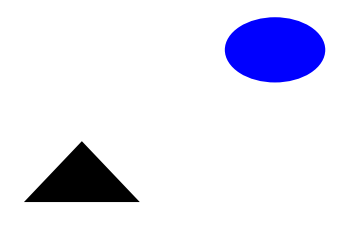

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle, Rectangle

# red, blue, yellow, green = '#ff0000', '#0000ff', '#ffff00', '#00ff00' # 'red' とかすればよいのでこの行は不要
# square = Rectangle((0.7, 0.1), 0.25, 0.25, facecolor='red')
circle = Circle((0.8, 0.8), 0.15, facecolor='blue')
# triangle = Polygon(((0.05,0.1), (0.396,0.1), (0.223, 0.38)), fc=yellow)
triangle = Polygon(((0.05,0.1), (0.396,0.1), (0.223, 0.38)), fc='black') # fc="k"
# rhombus = Polygon(((0.5,0.2), (0.7,0.525), (0.5,0.85), (0.3,0.525)),  fc=green)

fig = plt.figure(figsize=(6,4))
# ax = fig.add_subplot(aspect='equal')
ax = fig.add_subplot() # aspect='equal' とするか figsize=(a,a)としないと縦横比が崩れる
# for shape in (square, circle, triangle, rhombus):
#     ax.add_artist(shape)
ax.add_artist(circle)
ax.add_artist(triangle)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
ax.set_axis_off()
plt.show()

メモ

figsize を知る方法

print(fig.get_size_inches())

# add_patch で図形を描く

https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

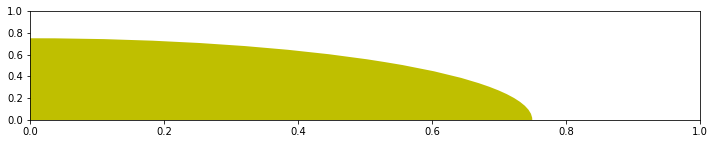

In [2]:
# 実験
# import matplotlib.patches as patches とする流儀もあるがそれをしなくて済むならその方が簡単
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot()

circle = plt.Circle((0, 0), radius=0.75, fc='y')
ax.add_patch(circle)

# ax.axis('scaled')
plt.show()

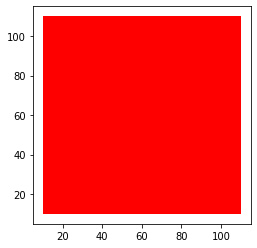

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

rectangle = plt.Rectangle((10, 10), 100, 100, fc='r')
ax.add_patch(rectangle)

ax.axis('scaled')
plt.show()

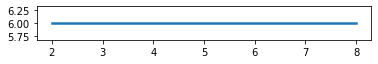

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Line2D は add_patch ではなく、add_line であることに注意
# 最初のタプルが x 座標で、次のタプルが y 座標
line = plt.Line2D((2, 8), (6, 6), lw=2.5)
ax.add_line(line)

ax.axis('scaled')
plt.show()


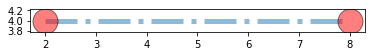

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# ls が線のスタイルで、marker は start, end
dotted_line = plt.Line2D((2, 8), (4, 4), lw=5., 
                         ls='-.', marker='.', 
                         markersize=50, 
                         markerfacecolor='r', 
                         markeredgecolor='k', 
                         alpha=0.5)
plt.gca().add_line(dotted_line)

ax.axis('scaled')
plt.show()


# 多角形 polygon

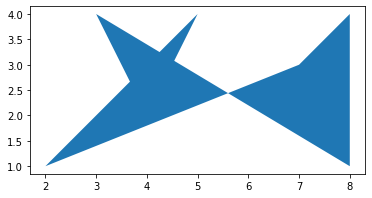

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# 頂点の座標のリストを引数とする
points = [[8, 1],[8, 4],[7,3],[2, 1],[5,4],[4,2],[3,4]]
polygon = plt.Polygon(points)
ax.add_patch(polygon)

ax.axis('scaled')
plt.show()





# いまここ

[12.  2.]


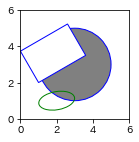

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib as mpl
 
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot()
 
circ = patch.Circle(xy=(3, 3), radius=2, ec='b', fc='gray')
elli = patch.Ellipse(xy=(2, 1), width=2, height=1, ec='g', fill=False, angle=10)
rect = patch.Rectangle(xy=(1, 2), width=3, height=2, ec='b', fc='w', angle=30)
 
ax.add_patch(circ)
ax.add_patch(elli)
ax.add_patch(rect)
 
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
# size = fig.get_size_inches()*fig.dpi # size in pixels
size = fig.get_size_inches()
print(size)
plt.show()

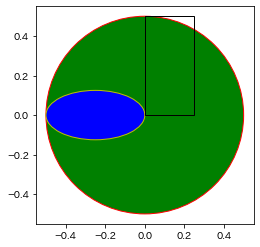

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = plt.axes()

# fc = face color, ec = edge color
c = patches.Circle(xy=(0, 0), radius=0.5, fc='g', ec='r')
e = patches.Ellipse(xy=(-0.25, 0), width=0.5, height=0.25, fc='b', ec='y')
r = patches.Rectangle(xy=(0, 0), width=0.25, height=0.5, ec='#000000', fill=False)
ax.add_patch(c)
ax.add_patch(e)
ax.add_patch(r)

plt.axis('scaled')
ax.set_aspect('equal')

# plt.savefig('data/dst/matplotlib_patches.png')

# ax.set_axis_off() を発見!!!!

どうやって発見したかを書いておこう。 dir(ax) で subplot で作られた描画領域にどんなメソッドがあるか見れる。その中に set_axis_off というのがあったので使ってみて見つけた。

使ってみて、それからhelpでdocstringを読んで、それで完璧。

matplotlibはpythonのモジュールなので、pythonのhelpやdirが使えるので、マニュアルがなくても、マニュアルに細かいことが書いてなくても、やりたいことが言語化できれば探せる。

ax.axis("off") でも消えるって。 => 消えたけど、plt.show()したら消えてなかった。ax.set_axis_off()の方がいいね。

もう一つ、pylab.box(False) というのを使っている人がいた。これも import するモジュールが１つ増えるのでボツ。


# Colabにようこそ、の例


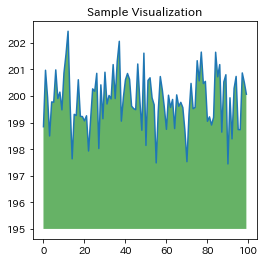

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

# 数直線


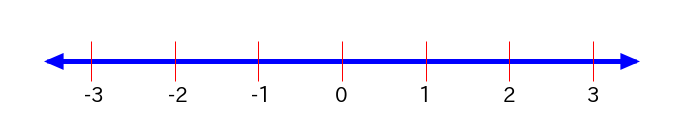

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(xlim=(-4,4), ylim=(0, 1.0))

# blue arrow
ax.arrow(-3.5, 0.5, 7, 0.0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
ax.arrow(3.5, 0.5, -7, 0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)

x = [-3, -2, -1, 0, 1, 2, 3]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
data_name = ["-3", "-2", "-1", "0", "1", "2", "3"]
ax.plot(x, y, 'r|', ms="40")

xy = zip (x, y)
xy_name = zip (xy, data_name)
for (i, name) in zip (xy, data_name) :
    ax.annotate(name,i, xycoords='data', xytext=(-7,-40), textcoords='offset points', fontsize=20)
# for (i, j, name) in zip (x, y, data_name) :
#     plt.text(i, j, name, fontsize=15, position=(i-0.05, j-0.2))

ax.set_axis_off()
plt.show()

TypeError: ignored

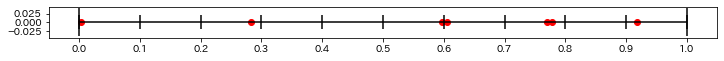

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 配列を生成
rand_size = 7 # 配列のサイズ
rand = np.random.random_sample(rand_size) # 0-1の間のrandomをrand_size個生成
rand = sorted(rand) #ソート
y = [0]*rand_size # random_size個の 0 の配列

#数直線
fig,ax=plt.subplots(figsize=(10,1)) #画像サイズ
# fig.set_figheight(1) #高さ調整
# ax.tick_params(labelbottom=True, bottom=False) #x軸設定
# ax.tick_params(labelleft=False, left=False) #y軸設定

xmin, xmax= 0,1 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(rand,y,c='r') #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
plt.vlines(x=[i for i in range(xmin,xmax+1,1)],ymin=-0.04,ymax=0.04) #目盛り線（大）
plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,1)],ymin=-0.02,ymax=0.02) #目盛り線（小）
line_width=0.1#目盛り数値の刻み幅
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
# pylab.box(False) #枠を消す
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# ax.gca().set_visible(False)
ax.spines().set_visble(False)
ax.spines().set_visible()
# ax.set_axis_off()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rand_size = 7 
rand = np.random.random_sample(rand_size) # 0-1の間のrandomをrand_size個生成
rand = sorted(rand) 
y = [0]*rand_size # y=0 をrand_size個生成

#数直線
fig,ax=plt.subplots(figsize=(10,10)) #画像サイズ
fig.set_figheight(1) #高さ調整
ax.tick_params(labelbottom=True, bottom=False) #x軸設定
ax.tick_params(labelleft=False, left=False) #y軸設定

#数直線上の数値を表示
for i in range(int(rand_size/2)+1):
    ax.annotate('{0:.3f}'.format(rand[2*i]),
                 xy=(rand[2*i],y[2*i]),
                 xytext=(10, 20),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.3")
                )

for i in range(int(rand_size/2)):
    ax.annotate('{0:.3f}'.format(rand[2*i+1]),
                 xy=(rand[2*i+1],y[2*i+1]),
                 xytext=(10, -50),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-.3")
                )

xmin, xmax= 0,1 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(rand,y,c='r') #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
plt.vlines(x=[i for i in range(xmin,xmax+1,1)],ymin=-0.04,ymax=0.04) #目盛り線（大）
plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,1)],ymin=-0.02,ymax=0.02) #目盛り線（小）
line_width=0.1#目盛り数値の刻み幅
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
# ax.set_axis_off()
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

ax=plt.figure(figsize=(12,6)).add_subplot(xlim=(-4,4), ylim=(0, 1.0))

plt.arrow(-3.5, 0.5, 7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
plt.arrow(3.5, 0.5, -7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)

x = [-3, -2, -1, 0, 1, 2, 3]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
data_name = ["-3", "-2", "-1", "0", "1", "2", "3"]
plt.plot(x, y, 'r|', ms="40")

for (i, j, name) in zip (x, y, data_name) :
    plt.text(i, j, name, fontsize=15, position=(i-0.05, j-0.2))

# plt.savefig("numberline.svg")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace (-1, 1)
y = np.tan(x)

plt.plot(x, y)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(2,3, "r^")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot?

# 点をプロットする

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [5,6,7,8]
plt.plot(x, y, 'o-', label="test data") 
plt.xlabel("x-axis")   
plt.ylabel("y-axis")    
# plt.legend(loc='best')  
plt.legend()
plt.title("title")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y1 = [5,6,7,8]
y2 = [4,2,8,6]

plt.plot(x, y1, 'o-', label='y1')  
plt.plot(x, y2, 'o-', label='y2')  
plt.legend(loc='best')             
plt.show()

# 関数

`x = np.arange()` で範囲を決め、`y` を関数の値にしてプロットする。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3.0, 3.0, 0.1)
y = np.sin(x) * np.exp( -x)
plt.plot(x, y, '-')
plt.show()

# ログスケールにする

`plt.yscale('log')` で `y`軸がログスケールになる。

In [ ]:
import numpy as np
import matplotlib.pyplot ast pl

x = np.arange( -3.0, 3.0, 0.01 )
y = np.exp(-x) * np.cos(x)*np.cos(x)
plt.plot(x, y, '-')
plt.yscale('log')
plt.show()

In [ ]:
%%writefile test.dat
1 2 4
3 4 9
5 6 2
7 8 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plotfile('test.dat', cols=(0,1), names=('x','y'), delimiter=' ', marker='o', linestyle='--')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dat = np.loadtxt("test.dat", comments='#', delimiter=' ')
plt.plot( dat[:,0]/1000, dat[:,1], 'o-' )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

names = ('x','y1','y2')
plt.plotfile('test.dat', cols=(0,1), names=names, delimiter=' ', label="y1")
plt.plotfile('test.dat', cols=(0,2), names=names, delimiter=' ', label="y2", newfig=False)
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure()     # bufferのクリア
x = [1,2,3,4]
y = [5,6,7,8]
plt.plot(x, y, 'o-', label="my data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.savefig('plot.png')

In [ ]:
!ls


# サインカーブ

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi   #mathモジュールのπを利用

x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = np.sin(x)

plt.plot(x, y)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi   #mathモジュールのπを利用

x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = np.sin(x)

plt.plot(x, y, label='sin')
plt.title('Sin Graph')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi   #mathモジュールのπを利用

x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = np.sin(x)
cos_y = np.cos(x)

plt.plot(x, y, label='sin')
plt.plot(x, cos_y, label='cos')

plt.title('Sin Graph')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

plt.show()

# Usage Guide

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots () # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

### Parts of a Figure

Title, Legend, Grid, Line (line plot), Major tick, Minor tick, Major tick label, Y axis label, Markers (scatter plot), Figure, Axes, Spines, X axis label, Minor tick label, canvas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
# ax.set_axis_off()
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [ ]:
dir(ax)

In [ ]:
# convert a pandas.DataFrame

# a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
# a_asarray = a.values

In [ ]:
# convert a numpy.matrix

# b = np.matrix([[1, 2], [3, 4]])
# b_asarray = np.asarray(b)

### OO-style vs. pyplot (matlib) style


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.set_axis_off()
# plt.show()

In [ ]:
print(np.linspace(0,49, 50))

In [ ]:
ax.set_axis_off?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 10)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})
ax.set_axis_off()
# ax.axis("off")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': ''})
ax1.set_axis_off()
ax2.set_axis_off()
# ax.axis("off")
plt.show()


Backends
https://matplotlib.org/tutorials/introductory/usage.html#backends

In [ ]:
import matplotlib.pyplot as plt
# plt.ion()
plt.ioff()
plt.plot([1.6, 2.7])

In [ ]:

plt.title("interactive test")
plt.xlabel("index")

In [ ]:
ax = plt.gca()
ax.plot([3.1, 2.2])
plt.draw()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

In [ ]:
# from wikipedia
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() 

a = np.linspace(0,10,100)
b = np.exp(-a)
ax.plot(a,b)
plt.show()

In [ ]:
# from wikipedia
import matplotlib.pyplot as plt
from numpy.random import normal,rand
fig, ax = plt.subplots() 

x = normal(size=200)
ax.hist(x,bins=30)
plt.show()

In [ ]:
# from wikipedia
import matplotlib.pyplot as plt
from numpy.random import rand
fig, ax = plt.subplots() 

a = rand(100)
b = rand(100)
ax.scatter(a,b)
plt.show()

In [ ]:
# from wikipedia

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

# Pyplot tutorial

ここから
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

ax.plot([1, 2, 3, 4])
ax.set_ylabel('some numbers')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
ax.axis([0, 6, 0, 20])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() 

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
ax.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() 

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')
plt.show()

https://minus9d.hatenablog.com/entry/2015/01/26/225731
matplotlibをオブジェクト指向スタイルで使う その1


https://qiita.com/NTeTN/items/5a16389a1cbfad532a8f
ゼロからはじめるmatplotlib〜4.オブジェクト指向スタイル〜

In [ ]:

t = np.arange(0.0, 1.0, 0.01)

####################
#1つ目のウィンドウ
####################
fig1 = plt.figure(1)

################################
#1つ目のウィンドウ 1つ目のグラフ
################################
ax1 = fig1.add_subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax1.grid(True)
ax1.set_ylim( (-2,2) )
ax1.set_xlabel('t')
ax1.set_ylabel('f(t)')
ax1.set_title('sin function')

################################
#1つ目のウィンドウ 2つ目のグラフ
################################
ax2 = fig1.add_subplot(212)
ax2.plot(t, np.cos(2*np.pi*t))
ax2.grid(True)
ax2.set_ylim( (-2,2) )
ax2.set_xlabel('t')
ax2.set_ylabel('f(t)')
ax2.set_title('cos function')



####################
# 2つ目のウィンドウ
####################
fig2 = plt.figure(2)

################################
# 2つ目のウィンドウ 1つ目のグラフ
################################
# 等高線
ax1 = fig2.add_subplot(211)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

ax1.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = ax1.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
ax1.clabel(C, inline=1, fontsize=10)
ax1.set_title('contour')

################################
# 2つ目のウィンドウ 2つ目のグラフ
################################
ax2 = fig2.add_subplot(212)
ax2.plot([1, 4, 3, 6, 5, 9])
ax2.grid(True)
ax2.set_ylabel('values')
ax2.set_title('points')



################################
# 2つのウィンドウを表示
################################
fig1.tight_layout()  # グラフの文字がかぶらないようにする
fig2.tight_layout()  # グラフの文字がかぶらないようにする
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np


names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [ ]:
x = np.arange(0,2*np.pi,0.01)
fig, ax = plt.subplots(1,2)

# 左のグラフ
ax[0].plot(x, np.sin(x))
ax[0].set_title("sinx")


# 右のグラフ
ax[1].plot(x, np.cos(x))
ax[1].set_title("cosx");

In [ ]:
x = np.arange(0,2*np.pi,0.01)

# facecolorで外側をskyblueにしてみた。
fig, ax = plt.subplots(1,2, facecolor='skyblue')

# 左のグラフ
ax[0].plot(x, np.sin(x))
ax[0].set_title("sinx")

# 右のグラフ
ax[1].plot(x, np.cos(x))
ax[1].set_title("cosx");

# グラフの配置が自動調整されます。
fig.tight_layout()

In [ ]:
theta = np.arange(0,2*np.pi,0.01)

# 全体のサイズ調節
fig, ax = plt.subplots(2, 3, facecolor='skyblue')

# 右上[0,0]
ax[0,0].plot(theta, np.sin(theta))
ax[0,0].set_title("sin")
ax[0,0].grid()

# 中上[0,1]
ax[0,1].plot(theta, np.cos(theta))
ax[0,1].set_title("cos")
ax[0,1].grid()

# 右上[0,2]
ax[0,2].plot(theta-np.sin(theta), 1-np.cos(theta))
ax[0,2].set_title("cycloid")
ax[0,2].grid()

# 左下[1,0]
ax[1,0].plot(np.power(np.cos(theta),3), np.power(np.sin(theta),3))
ax[1,0].set_title("asteroid")
ax[1,0].grid()

# 中下[1,1]
ax[1,1].plot((1+np.cos(theta))*np.cos(theta), (1+np.cos(theta))*np.sin(theta))
ax[1,1].set_title("cardioid")
ax[1,1].grid()

# 右下[1,2]
theta2 = np.arange(0,10*np.pi,0.01) # インボリュート曲線用
ax[1,2].plot(np.cos(theta2)+theta2*np.sin(theta2), np.sin(theta2)-theta2*np.cos(theta2))
ax[1,2].set_title("involute of circle")
ax[1,2].grid()

# グラフ位置の自動調整
fig.tight_layout()

# text example

# デカルト平面

https://stackoverflow.com/questions/13430231/how-i-can-get-cartesian-coordinate-system-in-matplotlib
How I can get cartesian coordinate system in matplotlib?

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.text(0.99, 0.99, 'right top corner',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='blue', fontsize=15)

ax.text(1.5,1.0,'A',color='red',fontsize=20)

ax.plot([2], [1], 'o')

ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(xlim=(-4,4), ylim=(-4, 4))

# arrows
ax.arrow(-3.5, 0.0, 7, 0.0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
ax.arrow(3.5, 0.0, -7, 0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
ax.arrow(0.0, -3.5, 0.0, 7.0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
ax.arrow(0.0, 3.5, 0.0, -7.0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)

x1 = [-3, -2, -1, 1, 2, 3]
y1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
data_name = ["-3", "-2", "-1", "1", "2", "3"]
ax.plot(x1, y1, 'r|', ms="20")

x2 = [0,0,0,0,0,0]
y2 = [-3,-2,-1,1,2,3]
ax.plot(x2, y2, 'r_', ms="20")
ax.plot(2,2,"ro")
ax.plot(0,0,"ro")

for (i, j, name) in zip (x1, y1, data_name) :
    ax.text(i, j, name, fontsize=15, position=(i-0.1, j-0.6))
for (i, j, name) in zip (x2, y2, data_name) :
    ax.text(i, j, name, fontsize=15, position=(i-0.5, j - 0.1))
ax.annotate("Origin",xy=(-0.2,0.2), xytext=(-2,2), ha='center', fontsize=15, arrowprops={'arrowstyle':'->'})
ax.annotate("",xy=(2,0), xytext=(2,2), arrowprops={'arrowstyle':'<-'})
ax.annotate("",xy=(0,2), xytext=(2,2), arrowprops={'arrowstyle':'<-'})
ax.text(3.8,-0.2,"$x$",fontsize=15)
ax.text(0.3,3.5,"$y$",fontsize=15)
ax.text(2.2,2.0,"$A (x, y)$", fontsize=15)
ax.set_axis_off()
plt.show()


In [ ]:
from pylab import *
import matplotlib.pyplot as plt

x = [0,2,-3,-1.5]
y = [0,3,1,-2.5]
color=['m','g','r','b']

fig = plt.figure()
ax = fig.add_subplot(111)

scatter(x,y, s=100 ,marker='o', c=color)

[ plot( [dot_x,dot_x] ,[0,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ] 
[ plot( [0,dot_x] ,[dot_y,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ]

left,right = ax.get_xlim()
low,high = ax.get_ylim()
arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 ) 

grid()

show()

In [ ]:
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

# Enter x,y coordinates and colors of points
x = [0, 2, -3, -1.5]
y = [0, 3, 1, -2.5]
color = ['m', 'g', 'r', 'b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Plot points
ax.scatter(x, y, c=color)

# Draw lines connecting points to axes
[ax.plot([dot_x, dot_x], [0, dot_y], c=c, ls='--', lw=1.5, alpha=0.5) for dot_x, dot_y, c in zip(x, y, color)] 
[ax.plot([0, dot_x], [dot_y, dot_y], c=c, ls='--', lw=1.5, alpha=0.5) for dot_x, dot_y, c in zip(x, y, color)]

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=15)

In [ ]:
import matplotlib.pyplot as plt


def build_cartesian_plane(max_quadrant_range):
    """ The quadrant range controls the range of the quadrants"""
    l = []
    zeros = []
    plt.grid(True, color='b', zorder=0,)
    ax = plt.axes()
    head_width = float(0.05) * max_quadrant_range
    head_length = float(0.1) * max_quadrant_range
    ax.arrow(0, 0, max_quadrant_range, 0, head_width=head_width, head_length=head_length, fc='k', ec='k',zorder=100)
    ax.arrow(0, 0, -max_quadrant_range, 0, head_width=head_width, head_length=head_length, fc='k', ec='k', zorder=100)
    ax.arrow(0, 0, 0, max_quadrant_range, head_width=head_width, head_length=head_length, fc='k', ec='k', zorder=100)
    ax.arrow(0, 0, 0, -max_quadrant_range, head_width=head_width, head_length=head_length, fc='k', ec='k', zorder=100)
    counter_dash_width = max_quadrant_range * 0.02
    dividers = [0,.1,.2,.3,.4, .5, .6, .7, .8, .9, 1]
    for i in dividers:
        plt.plot([-counter_dash_width, counter_dash_width], [i*max_quadrant_range, i*max_quadrant_range], color='k')
        plt.plot([i * max_quadrant_range, i*max_quadrant_range], [-counter_dash_width, counter_dash_width], color='k')
        plt.plot([-counter_dash_width, counter_dash_width], [-i * max_quadrant_range, -i * max_quadrant_range], color='k')
        plt.plot([-i * max_quadrant_range, -i * max_quadrant_range], [-counter_dash_width, counter_dash_width], color='k')
        l.append(i * max_quadrant_range)
        l.append(-i * max_quadrant_range)
        zeros.append(0)
        zeros.append(0)


build_cartesian_plane(10)
plt.show()

# arrow style

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0,1)
ax.plot(x, x, 'o')

ax.annotate('default line', xy=(0.15,0.1), xytext=(0.6,0.1),
            arrowprops={'arrowstyle': '-'}, va='center')
ax.annotate('dashed line', xy=(0.25,0.2), xytext=(0.6,0.2),
            arrowprops={'arrowstyle': '-', 'ls': 'dashed'}, va='center')
ax.annotate('default arrow', xy=(0.35,0.3), xytext=(0.6,0.3),
            arrowprops={'arrowstyle': '->'}, va='center')
ax.annotate('thick blue arrow', xy=(0.45,0.4), xytext=(0.6,0.4),
            arrowprops={'arrowstyle': '->', 'lw': 4, 'color': 'blue'},
            va='center')
ax.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax.annotate('arrow with closed head', xy=(0.55,0.6), xytext=(0.1,0.6),
            arrowprops={'arrowstyle': '-|>'}, va='center')
ax.annotate('a really thick red arrow\nwith not much space', xy=(0.65,0.7),
            xytext=(0.1,0.7), va='center', multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r'})
ax.annotate('a really thick red arrow\nwith space between\nthe tail and the'
            'label', xy=(0.85,0.9), xytext=(0.1,0.9), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r', 'shrinkA': 10})

plt.show()